# Minority Game Memory Dynamics


Compare two simulations one with fixed memory and one with a distribution of memory, we argue that the one with the distribution would lead to a more efficient equilibrium.  

**Make sure to include** `import allow_local_imports` on top of every notebook in `notebooks/` dir to be able to use `lib/` modules.

## Import Libraries

In [108]:
import numpy as np
#import networkx as nx
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
from scipy.stats import norm

In [109]:
# Include this on top, as the first import 
# This must always be imported first. If you are restarting the notebook
# don't forget to run this cell first!
import allow_local_imports
# Use anything from lib package
# E.g.
#from lib.functions import simulate_simple_game
#simulate_simple_game()
from lib.minority_game import MinorityGame
from lib.agents.agent import Agent, StrategyUpdatingAgent
from lib.agents.factory import AgentFactory
from lib.strategies import AlwaysOneStrategy, DefaultStrategy, FiftyFiftyStrategy
from lib.memory import UniformMemoryGenerator
from lib.plots import default_plot


In [110]:
# helper functions
def hist_sp_plot(x1,y1):
    fig, axes = plt.subplots(1,2, figsize=(20,8))
    fig.suptitle('Success rate as a function of update rate \n (MG with s=%s, N=%s)'%(s, n_agents), fontsize=18)

    axes[0].axhline(y=success_rate0, color="k", linestyle="--")
    axes[0].plot(x1, y1)
    axes[0].set_xlabel('update rate',fontsize=15)
    axes[0].set_ylabel('success rate',fontsize=15)

    counts, bins = np.histogram(y1)
    axes[1].hist(bins[:-1], bins, weights=counts)
    axes[1].set_xlabel('success rate',fontsize=15)
    axes[1].set_ylabel('frequency',fontsize=15)
    plt.show()

## Base Senario - strategy update ratio p = 0

In [111]:
# main parameter initialisation
s = 2
m0 = 4
n_agents = 101
num_run = 50000
p_list=np.linspace(0, 0.1, 10)


In [112]:
'''
The following parameters have been initialized above:
    - n_agents
    - agent_cls = Agent
    - strategy_clss = [DefaultStrategy]
    - memory_generator = UniformMemoryGenerator(m0)
    - max_steps = 500

'''

game0 = MinorityGame(
    n_agents=n_agents,
    factory_dict={
        1: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
    }
)
times, attendances, mean_A_t, vol_A_t = game0.simulate_game(max_steps=num_run)
success_rate0=game0.total_success_rate()


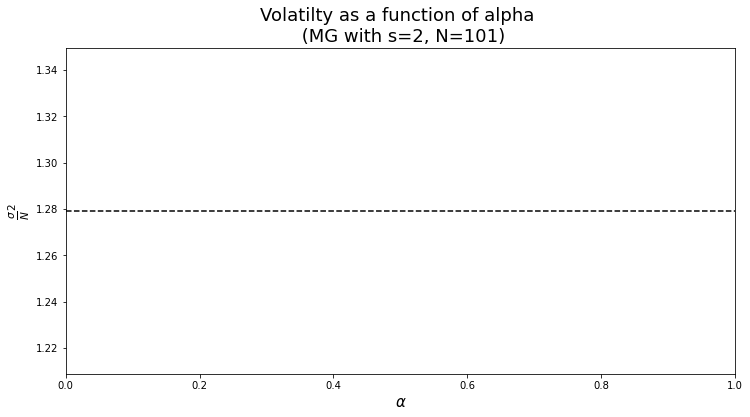

In [113]:
# plot base case
omega_0 = np.average(vol_A_t)/n_agents
alpha_0 = 2**m0/n_agents

fig, ax = plt.subplots(figsize=(12, 6))
ax.axhline(y=omega_0, color="k", linestyle="--")
#ax.axvline(x=alpha_0, color="k", linestyle="--")

plt.title("Volatilty as a function of alpha \n (MG with s=%s, N=%s)"%(s, n_agents), fontsize=18)
ax.set_xlabel(r"$\alpha$",fontsize=15)
ax.set_ylabel(r"$\frac{\sigma}{N}^2$",fontsize=15)

plt.show()

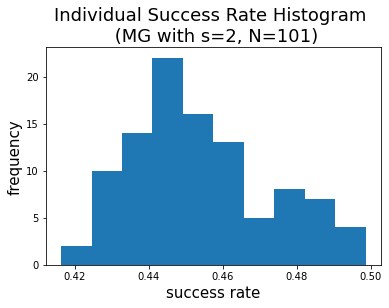

In [114]:
# compute individual success rate list
int_agent_success=[game0.agents[i].success_rate() for i in range(n_agents)]

# plot histogram
counts0, bins0 = np.histogram(int_agent_success)
plt.hist(bins0[:-1], bins0, weights=counts0)
plt.xlabel('success rate',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.title('Individual Success Rate Histogram \n (MG with s=%s, N=%s)'%(s, n_agents), fontsize=18)
plt.show()

## Base Senario - p = 0.03

In [ ]:
game02 = MinorityGame(
    n_agents=n_agents,
    factory_dict={
        1: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy],
                strategy_update_rate=0.03,
                strategy_update_fraction=0.3
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
    }
)
times02, attendances02, mean_A_t02, vol_A_t02 = game02.simulate_game(max_steps=num_run)
success_rate02=game02.total_success_rate()

## Base Senario - 2 groups w/ one p = 0.03

In [115]:
game01 = MinorityGame(
    n_agents=n_agents,
    factory_dict={
        0.8: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
        0.2: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[DefaultStrategy,DefaultStrategy],
                strategy_update_rate=0.03,
                strategy_update_fraction=0.3
            ),
            memory_generator=UniformMemoryGenerator(m0)
        ),
    }
)
times01, attendances01, mean_A_t01, vol_A_t01 = game01.simulate_game(max_steps=num_run)
success_rate01=game01.total_success_rate()

## Plot Approach No.1

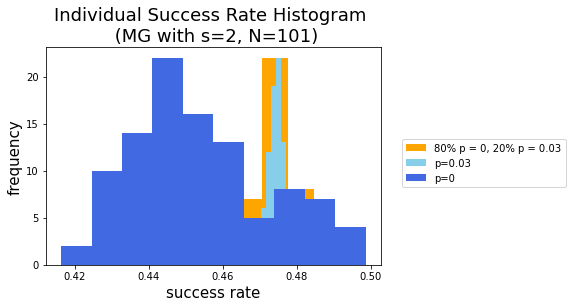

In [117]:
# compute individual success rate list
int_agent_success01=[game01.agents[i].success_rate() for i in range(n_agents-1)]
int_agent_success02=[game02.agents[i].success_rate() for i in range(n_agents-1)]

# plot histogram
counts01, bins01 = np.histogram(int_agent_success01)
plt.hist(bins01[:-1], bins01, weights=counts01,color='orange')

counts02, bins02 = np.histogram(int_agent_success02)
plt.hist(bins02[:-1], bins02, weights=counts02,color='skyblue')

counts0, bins0 = np.histogram(int_agent_success)
plt.hist(bins0[:-1], bins0, weights=counts0,color='royalblue')

labels=("80% p = 0, 20% p = 0.03","p=0.03", "p=0")
plt.xlabel('success rate',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.title('Individual Success Rate Histogram \n (MG with s=%s, N=%s)'%(s, n_agents), fontsize=18)
plt.legend(labels, bbox_to_anchor = (1.05, 0.6))
plt.show()

## Plot Approach No.2

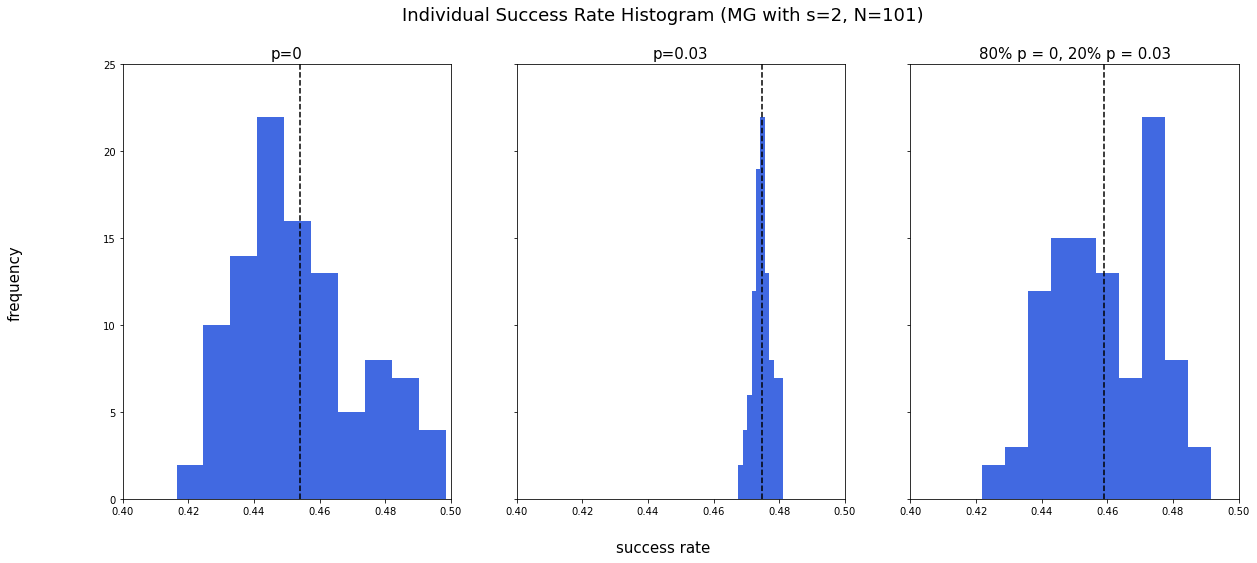

In [140]:
fig, axes = plt.subplots(1,3, sharex='col', sharey='row',figsize=(20,8))
fig.suptitle('Individual Success Rate Histogram (MG with s=%s, N=%s)'%(s, n_agents), fontsize=18)
fig.text(0.5,0.04, "success rate", ha="center", va="center",fontsize=15)
fig.text(0.05,0.5, "frequency", ha="center", va="center",fontsize=15, rotation=90)

# compute individual success rate list
int_agent_success=[game0.agents[i].success_rate() for i in range(n_agents)]
int_agent_success01=[game01.agents[i].success_rate() for i in range(n_agents-1)]
int_agent_success02=[game02.agents[i].success_rate() for i in range(n_agents-1)]

# plot histogram
counts0, bins0 = np.histogram(int_agent_success)
axes[0].hist(bins0[:-1], bins0, weights=counts0,color='royalblue')
axes[0].set_xlim(0.40, 0.50)
axes[0].set_ylim(0, 25)
axes[0].set_title("p=0", fontsize=15)
int_agent_success=np.array(int_agent_success)
avg_int_agent_success=np.mean(int_agent_success)
axes[0].axvline(x=avg_int_agent_success, color="k", linestyle="--")

counts02, bins02 = np.histogram(int_agent_success02)
axes[1].hist(bins02[:-1], bins02, weights=counts02,color='royalblue')
axes[1].set_xlim(0.40, 0.50)
axes[1].set_ylim(0, 25)
axes[1].set_title("p=0.03", fontsize=15)
int_agent_success02=np.array(int_agent_success02)
avg_int_agent_success02=np.mean(int_agent_success02)
axes[1].axvline(x=avg_int_agent_success02, color="k", linestyle="--")

counts01, bins01 = np.histogram(int_agent_success01)
axes[2].hist(bins01[:-1], bins01, weights=counts01,color='royalblue')
axes[2].set_xlim(0.40, 0.50)
axes[2].set_ylim(0, 25)
axes[2].set_title("80% p = 0, 20% p = 0.03", fontsize=15)
int_agent_success01=np.array(int_agent_success01)
avg_int_agent_success01=np.mean(int_agent_success01)
axes[2].axvline(x=avg_int_agent_success01, color="k", linestyle="--")

#plt.show()
plt.savefig("out/p_successrate_%s_%s.png" % (n_agents, s), dpi = 300)

## Senario No.2 - varying strategy update ratio w/ range(0, 0.1)

In [120]:
%%time
num_run = 5000
tot_omega_001 = []
tot_alpha_001 = []
tot_success_001 = []

for p in p_list:
    game2 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=p
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }
    )
    
    times2, attendances2, mean_A_t2, vol_A_t2 = game2.simulate_game(max_steps=num_run)
    success_rate = game2.total_success_rate()
    
    # in order to create the graph
    omega = np.average(vol_A_t2)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_001.append(omega)
    tot_alpha_001.append(alpha)
    tot_success_001.append(success_rate)
    

CPU times: user 19min 5s, sys: 5.05 s, total: 19min 10s
Wall time: 19min 19s


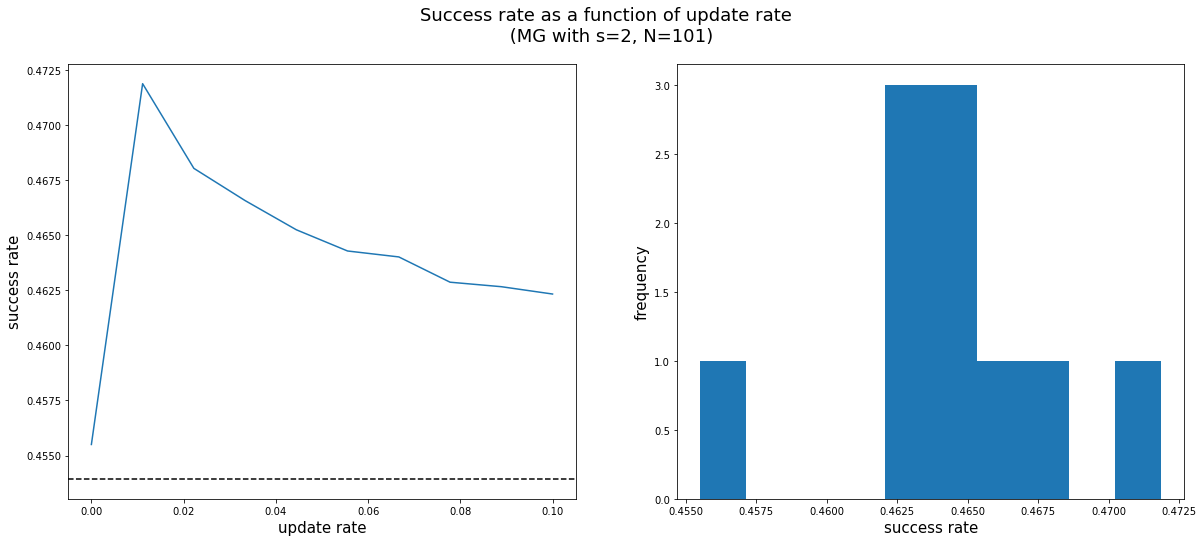

In [121]:
hist_sp_plot(p_list,tot_success_001)

## Senario No.2 - varying strategy update ratio w/ range(0, 1)

In [122]:
%%time
p_list2=np.linspace(0, 1, 10)
tot_omega_002 = []
tot_alpha_002 = []
tot_success_002 = []

for p in p_list2:
    game3 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                StrategyUpdatingAgent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy,DefaultStrategy],
                    strategy_update_rate=p
                ),
                memory_generator=UniformMemoryGenerator(m0)
            ),
        }
    )
    
    times3, attendances3, mean_A_t3, vol_A_t3 = game3.simulate_game(max_steps=num_run)
    success_rate3 = game3.total_success_rate()
    
    # in order to create the graph
    omega = np.average(vol_A_t2)/n_agents
    alpha = 2**m0/n_agents
    tot_omega_002.append(omega)
    tot_alpha_002.append(alpha)
    tot_success_002.append(success_rate3)
    

CPU times: user 29min, sys: 6.97 s, total: 29min 7s
Wall time: 29min 16s


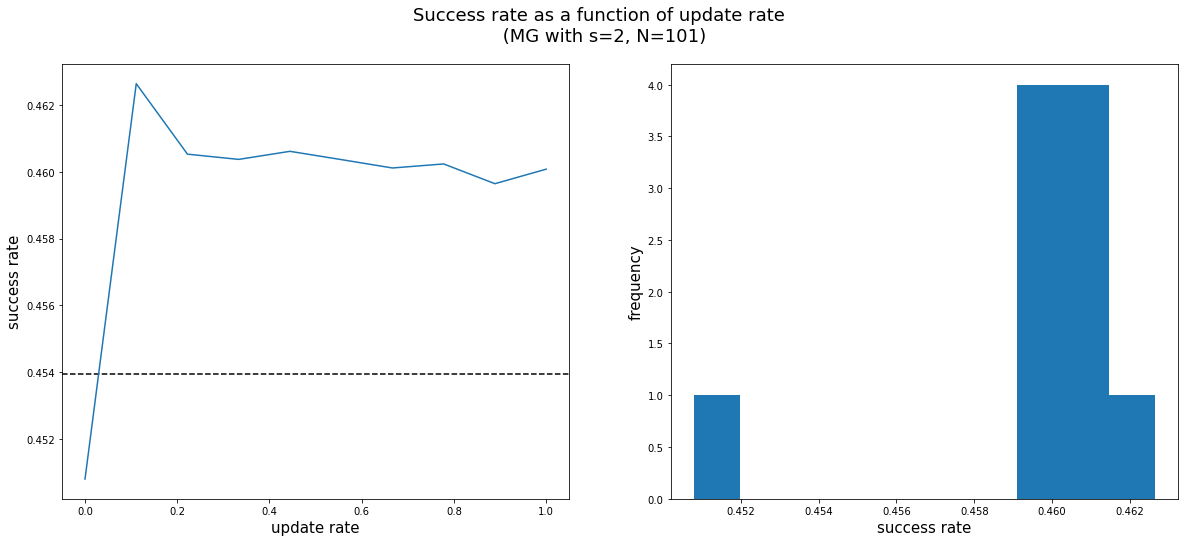

In [123]:
hist_sp_plot(p_list2,tot_success_002)

## Vary memory uniformly 

- Test 1: m is in the range(0,10)
- Test 2: m is 2, 7, 15 (ref to Moro(2004) Figure 2)


In [ ]:
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

In [ ]:
%%time
tot_omega_u = []
tot_alpha_u = []

for M in range (2,10):
    times_u, attendances_u, mean_A_t_u, vol_A_t_u = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                #StrategyUpdatingAgent,
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy, DefaultStrategy],
                    #strategy_clss=[DefaultStrategy,DefaultStrategy],
                    #strategy_update_rate=0.1
                ),
                memory_generator=UniformMemoryGenerator(M)
            ),
        }
    ).simulate_game(max_steps=500)
    # in order to create the graph
    omega_u = np.average(vol_A_t_u)/n_agents
    alpha_u = 2**M/n_agents
    tot_omega_u.append(omega_u)
    tot_alpha_u.append(alpha_u)

In [ ]:
tot_omega_u

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=omega_0, color="k", linestyle="--")
ax.plot(tot_alpha_u, tot_omega_u)
ax.set_xlabel(r"$\alpha$",fontsize=15)
ax.set_ylabel(r"$\frac{\sigma}{N}^2$",fontsize=15)

plt.title("MG with varying uniform memories \n m from 0 to 10, s=2, N=501", fontsize=18)

plt.show()

### Test 2

![alt text](pics/MoroFigure2.png)

In [ ]:
%%time
tot_time_u2 = []
tot_At_u2 = []
tot_omega_u2 = []
tot_alpha_u2 = []

m_ls = np.array([2,7,15])
for M in m_ls:
    times_u2, attendances_u2, mean_A_t_u2, vol_A_t_u2 = MinorityGame(
        n_agents=n_agents,
        factory_dict={
            1: AgentFactory(
                #StrategyUpdatingAgent,
                Agent,
                agent_kwargs=dict(
                    strategy_clss=[DefaultStrategy, DefaultStrategy],
                    #strategy_clss=[DefaultStrategy,DefaultStrategy],
                    #strategy_update_rate=0.1
                ),
                memory_generator=UniformMemoryGenerator(M)
            ),
        }
    ).simulate_game(max_steps=500)
    # in order to create the graph
    omega_u2 = np.average(vol_A_t_u2)/n_agents
    alpha_u2 = 2**M/n_agents
    tot_time_u2.append(times_u2)
    tot_At_u2.append(attendances_u2)
    tot_omega_u2.append(omega_u2)
    tot_alpha_u2.append(alpha_u2)

In [ ]:
fig,ax=plt.subplots(3,1,figsize=(12,6), dpi=80)
fig.suptitle('Action Volatility over Time', fontsize=25)

for i in range(0,3):
    ax[i].axhline(y=omega_0, color="k", linestyle="--")
    ax[i].plot(tot_time_u2[i], tot_At_u2[i], label=r"$\sigma^2$")
    ax[i].set_xlabel("t",fontsize=15)
    ax[i].set_ylabel(r"$\sigma^2$",fontsize=15)

labels=["m=2", "m=7", "m=15"]

fig.legend([11,12], labels=labels, loc='upper right')
plt.show()

# References

In [ ]:
times, attendances, mean_At, volatility_At = MinorityGame(
    n_agents=201,
    factory_dict={
        0.3: AgentFactory(
            Agent,
            agent_kwargs=dict(strategy_clss=[DefaultStrategy, DefaultStrategy]),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.5: AgentFactory(
            StrategyUpdatingAgent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy, AlwaysOneStrategy],
                strategy_update_rate=0.8
            ),
            memory_generator=UniformMemoryGenerator(m=3)
        ),
        0.2: AgentFactory(
            Agent,
            agent_kwargs=dict(
                strategy_clss=[FiftyFiftyStrategy, DefaultStrategy]
            ),
            memory_generator=UniformMemoryGenerator(m=2)
        ),
    }
).simulate_game()

default_plot(times, attendances)

In [ ]:
def integer_state(history):
    """
    maps a list of m combinations of 1s and -1s to a unique number
    INPUT| a list of the last m outputs of the game
    OUTPUT| a unique integer
    """
    state = 0
    p = len(history)-1
    for i in history:
        if i == 1:
            state += 2**p
        p -= 1
    return state
def maximum_index(score):
    """
    Returns the index of the maximum score (if more than one max, selects randomly)
    """
    maximos = np.argwhere(score == np.amax(score)).flatten()
    return np.random.choice(maximos)

def minority(A):
    """
    Return the winner action
    """
    if A < 0:
        return 1
    elif A > 0:
        return -1
    else:
        return 2*random.randint(0, 1)-1

def update_scores(N, S, A, strategies, state, scores, winner):
    for n in range(N):
        for s in range(S):
            if strategies[n][s][state] == winner:
                scores[n][s] += 1  # g[A(t)] = sign(A(t))
                #scores[n][s] += A
            else:
                scores[n][s] -= 1  # g[A(t)] = sign(A(t))
                #scores[n][s] += A
    return scores

def one_game(N, S, strategies, history, scores):
    actions = np.zeros(N)
    state = integer_state(history)
    for i in range(N):
        index_strategy = maximum_index(scores[i])
        actions[i] = strategies[i][index_strategy][state]
    A = np.sum(actions)
    winner = minority(A)
    scores = update_scores(N, S, A, strategies, state, scores, winner)
    history = np.concatenate((history[1:], [winner]))
    return A, history, scores

def one_simulation(N, S, M, T, imprime=10**8):
    history = 2*np.random.randint(2, size=M)-1
    strategies = 2*np.random.randint(2, size=(N, S, 2**M))-1
    scores = np.zeros((N, S))
    attendances = np.zeros(T)
    times = np.zeros(T)
    meanA = np.zeros(T)  # to control the convergence
    # simulation
    for t in range(T):
        if (t+1) % imprime == 0:
            print('         t={}/{}'.format(t+1, T))
        A, history, scores = one_game(N, S, strategies, history, scores)
        times[t] = t
        attendances[t] = A
        meanA[t] = np.mean(attendances[:t+1])  # mean of the attendance so far
    return times, attendances, meanA

# run the simulation
N1 = 501 #num of agents
S1 = 2 #strategy
M1 = 3 #memory
times, attendances, meanA = one_simulation(N1, S1, M1, T=5000, imprime = 500)

history = 2*np.random.randint(2, size=M1)-1
strategies = 2*np.random.randint(2, size=(N1, S1, 2**M1))-1
print(history)
print(strategies)

fig, ax = plt.subplots(figsize = (12,6))

ax.axhline(y=0, color='k', linestyle='--')
ax.plot(times, meanA, '-', label = r'$<A(t)>$')
ax.set_xlabel('t')
ax.set_ylabel('<A(t)>')
